# Required assignment 6.2: Building a confusion matrix in Python

In this notebook, you will create confusion matrices and calculate the specificity and sensitivity of both the whole data set and each age group within the individual data sets.

You will be looking at the effectiveness of mammogram breast cancer screening for women aged 60–83. For more information on breast cancer screening, see [Breast cancer screening](https://www.cancerresearchuk.org/about-cancer/breast-cancer/getting-diagnosed/screening/breast-screening).

First, import the necessary libraries.

In [3]:
#Import the necessary libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pathlib as pl
import os
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

The data set you will be working with comes from the Breast Cancer Surveillance Consortium, an American organisation that does research into breast cancer.

### Load the data set

In [4]:
df = pd.read_csv('data/m6-dataset.csv')

In [5]:
df.shape

(40000, 13)

In [6]:
df.columns

Index(['age_c', 'assess_c', 'cancer_c', 'compfilm_c', 'density_c', 'famhx_c',
       'hrt_c', 'prvmam_c', 'biophx_c', 'mammtype', 'CaTypeO', 'bmi_c',
       'ptid'],
      dtype='object')

The data set contains 40,000 rows and 13 features. The features 'assess_c' and 'cancer_c' are of primary interest for constructing the confusion matrix.

## Section 1: Confusion matrix

### Prompt 1: Write code to create a confusion matrix for the data set.

For this data set, you will compare the radiologist's assessment to the true cancer state of the patient.

Values of  1, 2 or 3 in the assess_c column are counted as being predictions of no cancer, while values of 0, 4 or 5 are counted as being predictions of cancer.

Use the 'cancer_c' column as the true indicator of whether the patient has cancer, with 0 indicating no cancer and 1 indicating cancer.

Use these values to calculate the number of true positives, false negatives, true negatives and false positives, and plot a confusion matrix.

Hint: You can use Seaborn heatmaps to plot your confusion matrix. If you first convert your confusion matrix into a data frame with correctly labelled columns and indexes, you can get the correct labels on your heatmap.

In [7]:
#GRADED CELL
def get_confusion_matrix(df):
    """creates a confusion matrix for the breast cancer screening data
    :param df: a dataframe of the data
    :returns: np.array confusion matrix"""
pass

# negatives = ['Negative', 'Benign findings', 'Probably benign']
# positives = ['Needs additional imaging', 'Suspicious abnormality', 'Highly suggestive of malignancy']
# cancer = ['Invasive cancer', 'ductal carcinoma in situ']
# no_cancer = ['No cancer diagnosis']

# YOUR CODE HERE

# Define the positive and negative prediction/outcome values
def get_confusion_matrix(df):
    negatives = [1, 2, 3] # - 1, 2, 3 in assess_c = 'no cancer' prediction (negative)
    positives = [0, 4, 5] # - 0, 4, 5 in assess_c = 'cancer' prediction (positive)
    no_cancer = [0] # - 0 in cancer_c = 'no cancer' (actual negative)
    cancer = [1] # - 1 in cancer_c = 'cancer' (actual positive)

# Use vectorized operations to find the count for each quadrant of the confusion matrix
# The .loc[] accessor with a boolean mask is highly efficient for this
# .isin() checks for membership in a list, and '&' is the logical AND operator
    
# True Positives (TP): Actual [1] AND radiologist predicted [1] right (0, 4, 5)
    TP = len(df.loc[df['assess_c'].isin(positives) & df['cancer_c'].isin(cancer)])
# False Negatives (FN): Actual [1] AND (but) radiologist predicted [0] wrong (1, 2, 3)
    FN = len(df.loc[df['assess_c'].isin(negatives) & df['cancer_c'].isin(cancer)])
# True Negatives (TN): Actual [0] AND radiologist predicted [0] right (1, 2, 3)
    TN = len(df.loc[df['assess_c'].isin(negatives) & df['cancer_c'].isin(no_cancer)])
# False Positives (FP): Actual [0] AND (but) radiologist predicted [1] wrong (0, 4, 5)
    FP = len(df.loc[df['assess_c'].isin(positives) & df['cancer_c'].isin(no_cancer)])
    
# Return the confusion matrix as a NumPy array
    return np.array([[TN, FP], [FN, TP]]) # standard layout
    # Actual Negative [0] in top row, Actual Positive [1] in bottom row

          Negative  Positive
Negative     36856      2885
Positive        33       226


Text(50.722222222222214, 0.5, 'Predicted Value')

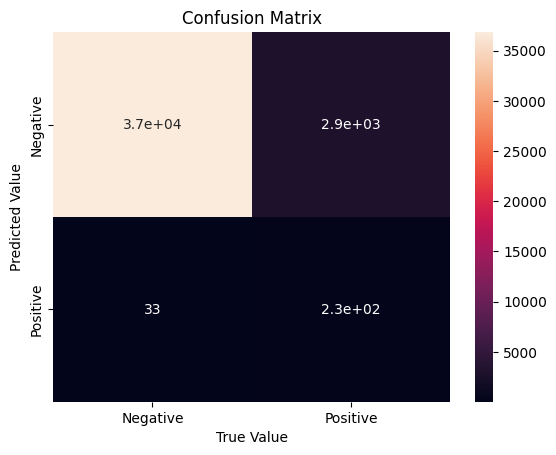

In [8]:
confusion_matrix = get_confusion_matrix(df)

plt.title('Confusion Matrix')
cf = pd.DataFrame(data = confusion_matrix, columns = ['Negative', 'Positive'], index = ['Negative', 'Positive'])
print(cf)
sn.heatmap(cf, annot=True)

plt.xlabel('True Value')
plt.ylabel('Predicted Value')

## Section 2: Calculate the sensitivity and specificity

### Prompt 2: Write a function to calculate the sensitivity and specificity of the breast cancer screening.

Calculate the sensitivity and specificity of the breast cancer screening.

**Sensitivity** =  $
\frac{\text{TP}}{\text{TP} + \text{FN}}
$

**Specificity** =  $
\frac{\text{TN}}{\text{TN} + \text{FP}}
$


In [14]:
###GRADED CELL
def calculate_sensitivity_specificity(confusion_matrix):
    """
    calculates sensitivity (recall) and specficity based on the True Positives,
    False Negatives, True Negatives and False Negatives and returns sensitivity ans specificity
    """
pass

    # YOUR CODE HERE
    # raise NotImplementedError()

def calculate_sensitivity_specificity(confusion_matrix):
    cm = confusion_matrix # using cm as a shorter variable for easier indexing

    # Calculate sensitivity (recall) [TP / (TP + FN)] using array indexing
    # index [1, 1] is TP, index [1, 0] is FN
    # The `if` statement handles the case where the denominator is zero.
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
    
    # Calculate specificity using array indexing. [TN / (TN + FP)]
    # index [0, 0] is TN, index [0, 1] is FP
    # The `if` statement handles the case where the denominator is zero.
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0

    # Return both calculated values.
    return sensitivity, specificity

sens, spec = calculate_sensitivity_specificity(confusion_matrix)
print(f"Sensitivity: {sens}")
print(f"Specificity: {spec}")
    

Sensitivity: 0.8725868725868726
Specificity: 0.9274049470320324


## Section 3: Compare the different age groups

### Prompt 3: For each age group ( 60–69, 70–79 and 80–89), plot a confusion matrix, and calculate the specificity and sensitivity.

Split the data into three data sets.
1. `age_60s`, which has data with age_c < 70.
2. `age_70s`, which has data between age_c>=70 and age_c<80.
3. `age_80s`, which has data with age_c>=80.

Hint: Use `data.loc[data['age_c']` for comparing the data with the different age ranges.

In [15]:
###GRADED CELL

# Split the data into three age groups using boolean indexing.
# The `age_c` column is the key for this split.
# .loc is used for label-based indexing to select rows that match the criteria.

age_60s = None # patients with age_c < 70
age_70s = None # patients with age_c >= 70 AND (&) age_c < 80
age_80s = None # patients with age_c >= 80

# YOUR CODE HERE
age_60s = df.loc[df['age_c'] < 70]
age_70s = df.loc[(df['age_c'] >= 70) & (df['age_c'] < 80)]
age_80s = df.loc[df['age_c'] >= 80]

# Store the new dataframes in a list
age_dfs = [age_60s, age_70s, age_80s]


60-69 0.8686131386861314 0.9229264297738751
70-79 0.8735632183908046 0.9340734028092433
80-89 0.8857142857142857 0.929646017699115


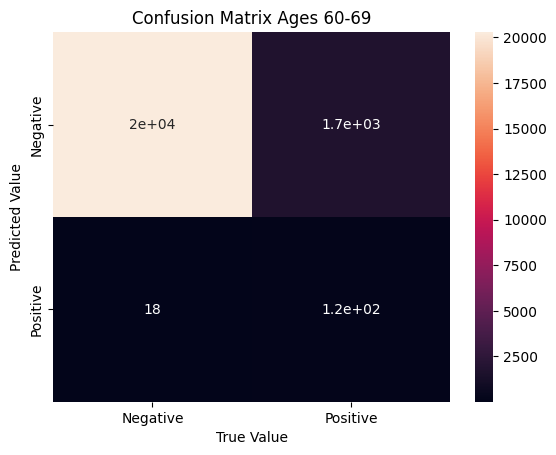

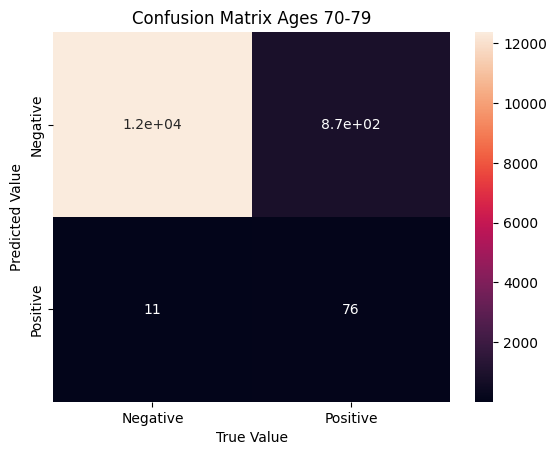

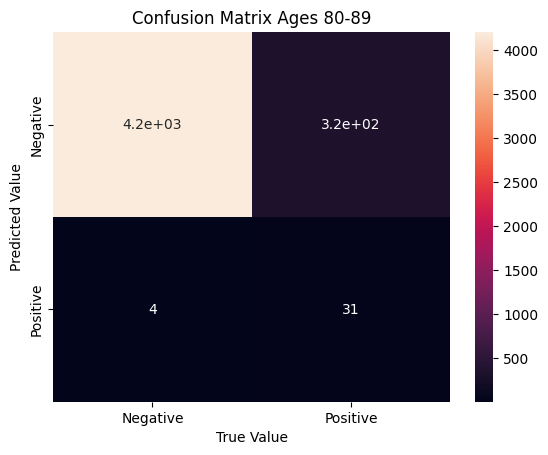

In [16]:
results = {}
ages = ['60-69', '70-79', '80-89']
for i, df in enumerate(age_dfs):
    confusion_matrix = get_confusion_matrix(df)
    results[ages[i]] = confusion_matrix

    sens, spec = calculate_sensitivity_specificity(confusion_matrix)

    fig = plt.figure()
    plt.title(f'Confusion Matrix Ages {ages[i]}')

    cf = pd.DataFrame(data = confusion_matrix, columns = ['Negative', 'Positive'], index = ['Negative', 'Positive'])
#     print(cf)
    sn.heatmap(cf, annot=True)

    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')

    print(ages[i], sens, spec)

## Section 4: Compute a confusion matrix using sklearn

Instead of writing a custom `get_confusion_matrix()` function, you can use the `confusion_matrix` method from `sklearn.metrics` to compute the confusion matrix directly.

### Prompt 4: Use `confusion_matrix()` from `sklearn` to compute the confusion matrix.

In [17]:
df1 = pd.read_csv('data/m6-dataset.csv')

          Negative  Positive
Negative     36856      2885
Positive        33       226


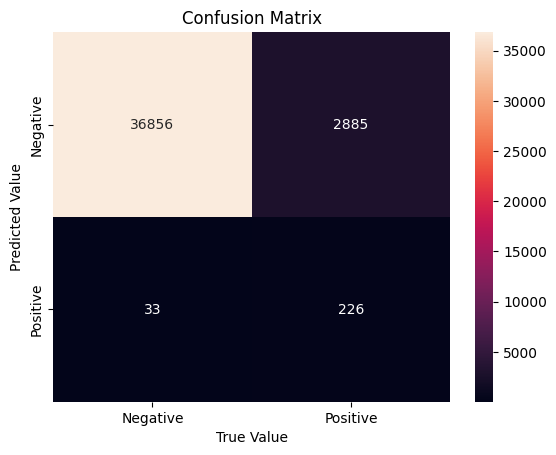

In [20]:
###GRADED CELL
# prepare the data for the scikit-learn function
from sklearn.metrics import confusion_matrix

# Create the 'predicted' labels from the 'assess_c' column
# a vectorized way to create a new Series 'predicted' without adding it to the DataFrame itself
# np.where(condition, value_if_true, value_if_false)
df1.loc[:, 'predicted'] = np.where(df1['assess_c'].isin([0, 4, 5]), 1, 0)

# The 'true' labels are the actual [1] outcomes from the 'cancer_c' column
true = df1['cancer_c']
# Assign the predicted labels to a variable "pred" to prepare for the confusion_matrix function.
pred = df1['predicted']

# Use the scikit-learn function to compute the confusion matrix
# confusion_matrix(y_true, y_pred) The function expects true labels first, then predicted labels
#cm = none
cm = confusion_matrix(true, pred)

# The rest of the code is for plotting and display

# Create a DataFrame from the confusion matrix to label the axes correctly
cf = pd.DataFrame(data = cm, columns = ['Negative', 'Positive'], index = ['Negative', 'Positive'])
print(cf) # Print the DataFrame to see the raw numbers

# Create a heatmap visualization of the confusion matrix.
sn.heatmap(cf, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()